In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

from lets_plot import *


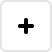
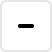
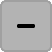
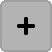
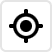
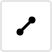
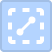
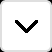
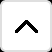
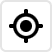
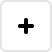
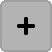
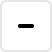
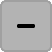
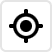
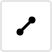
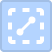
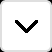
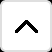
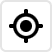

In [2]:
LetsPlot.setup_html()

In [3]:
mpg_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(mpg_df.shape)
mpg_df.head(3)

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [4]:
order = ['4', 'f', 'r']
drv_cat = pd.Categorical(mpg_df['drv'], categories=order, ordered=True)
mpg_df = mpg_df.assign(drv_idx=drv_cat.codes)

pairs = [('4','f'), ('4','r'), ('f','r')]

def mw_p(g1, g2):
    x = mpg_df.loc[mpg_df['drv'] == g1, 'hwy']
    y = mpg_df.loc[mpg_df['drv'] == g2, 'hwy']
    return mannwhitneyu(x, y, alternative='two-sided').pvalue

y_min, y_max = mpg_df['hwy'].min(), mpg_df['hwy'].max()
y_base = y_max + 4
step = max((y_max - y_min) * 0.1, 1.0)
dy_text = (y_max - y_min) * 0.03

ann_rows = []
for i, (a, b) in enumerate(pairs):
    x1, x2 = order.index(a), order.index(b)
    y = y_base + i * step
    p = mw_p(a, b)
    ann_rows.append(dict(
        x=x1, xend=x2, y=y, yend=y,
        xm=(x1 + x2) / 2, y_text=y + dy_text,
        label=f"p = {p:.3g}"
    ))

ann_df = pd.DataFrame(ann_rows)
print(ann_df.shape)
ann_df

(3, 7)


,x,xend,y,yend,xm,y_text,label
0,0,1,48.0,48.0,0.5,48.96,p = 9.04e-28
1,0,2,51.2,51.2,1.0,52.16,p = 0.041
2,1,2,54.4,54.4,1.5,55.36,p = 5.96e-11


In [5]:
ggplot(mpg_df, aes('drv_idx', 'hwy')) + \
    geom_boxplot() + \
    geom_segment(data=ann_df, mapping=aes(x='x', xend='xend', y='y', yend='y')) + \
    geom_text(data=ann_df, mapping=aes(x='xm', y='y_text', label='label'), vjust='bottom') + \
    scale_x_continuous(breaks=list(range(len(order))), labels=order) + \
    labs(x='drv', y='hwy')